In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [86]:
data = pd.read_csv('/content/loan')

In [87]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [88]:
data.shape

(614, 13)

In [89]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [91]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

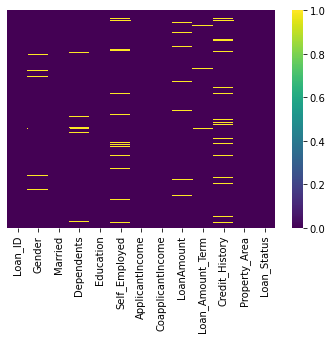

In [92]:
sns.heatmap(data.isnull(),yticklabels= False , cbar = True , cmap='viridis')

In [93]:
data['Gender'].fillna(data['Gender'].mode(), inplace = True)

In [94]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [96]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
label = LabelEncoder()

In [99]:
data = data.replace(to_replace='3+', value=4)

In [100]:
data['Dependents'].value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [107]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [108]:
data = data.dropna()

In [109]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

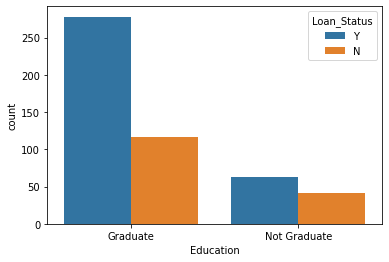

In [110]:
sns.countplot(x = 'Education', hue='Loan_Status', data = data)

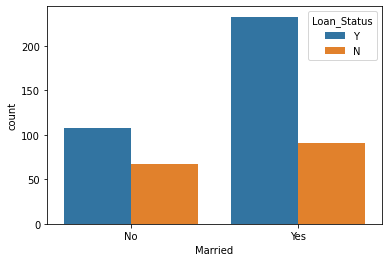

In [111]:
sns.countplot(x = 'Married', hue='Loan_Status', data= data)

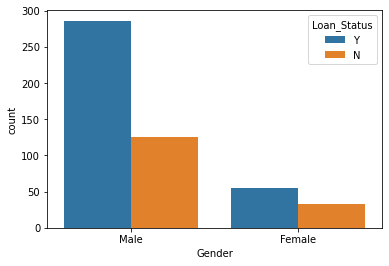

In [112]:
sns.countplot(x = 'Gender', hue= 'Loan_Status', data=data)

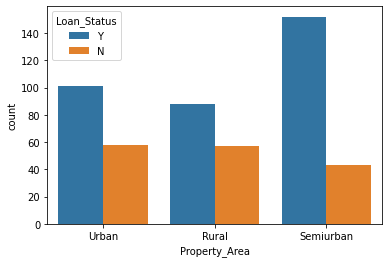

In [113]:
sns.countplot(x = 'Property_Area', hue='Loan_Status', data= data)

In [114]:
data['Loan_Status'] = label.fit_transform(data['Loan_Status'])

In [115]:
data['Loan_Status'].value_counts()

1    341
0    158
Name: Loan_Status, dtype: int64

In [116]:
data['Married'] = label.fit_transform(data['Married'])

In [117]:
data['Married'].value_counts()

1    324
0    175
Name: Married, dtype: int64

In [120]:
data['Education']  = label.fit_transform(data['Education'])
data['Self_Employed'] = label.fit_transform(data['Self_Employed'])
data['Property_Area'] = label.fit_transform(data['Property_Area'])
data['Gender']  = label.fit_transform(data['Gender'])

In [121]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [147]:
x = data.drop(columns=['Loan_Status','Loan_ID'], axis=1)
y = data['Loan_Status']

In [148]:
print(x)
print(y)

     Gender  Married  ... Credit_History  Property_Area
0         1        0  ...            1.0              2
1         1        1  ...            1.0              0
2         1        1  ...            1.0              2
3         1        1  ...            1.0              2
4         1        0  ...            1.0              2
..      ...      ...  ...            ...            ...
609       0        0  ...            1.0              0
610       1        1  ...            1.0              0
611       1        1  ...            1.0              2
612       1        1  ...            1.0              2
613       0        0  ...            0.0              1

[499 rows x 11 columns]
0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 499, dtype: int64


In [149]:
x.shape

(499, 11)

In [150]:
y.shape

(499,)

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size =0.1, random_state = 2)

In [180]:
print( x.shape , x_train.shape, x_test.shape)

(499, 11) (449, 11) (50, 11)


In [181]:
model = svm.SVC(kernel = 'linear')

In [182]:
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [183]:
y_predict = model.predict(x_test)

In [184]:
train = model.predict(x_train)
train_score = accuracy_score(train , y_train)
adj_r2_score = metrics.adjusted_rand_score (train, y_train)
MSE = metrics.mean_squared_error(train, y_train)
MAE = metrics.mean_absolute_error(train, y_train)

In [185]:
print('++++++++++++++  TRAIN_SET_RESULT+++++++++++++')
print('Train_accuracy_score is:', train_score)
print('Adj_R2_score is:',adj_r2_score)
print('mean_squared_error is :', MSE)
print('mean_absolute_error is :', MAE)

++++++++++++++  TRAIN_SET_RESULT+++++++++++++
Train_accuracy_score is: 0.8017817371937639
Adj_R2_score is: 0.3164986569987969
mean_squared_error is : 0.19821826280623608
mean_absolute_error is : 0.19821826280623608


In [188]:
test = model.predict(x_test)
test_score = accuracy_score(test , y_test)
adj_r2_score = metrics.adjusted_rand_score (test, y_test)
MSE = metrics.mean_squared_error(test, y_test)
MAE = metrics.mean_absolute_error(test, y_test)

In [189]:
print('++++++++++++++TEST_SET_RESULT+++++++++++++')
print('Test_accuracy_score is:', test_score)
print('Adj_R2_score is:',adj_r2_score)
print('mean_squared_error is :', MSE)
print('mean_absolute_error is :', MAE)



++++++++++++++TEST_SET_RESULT+++++++++++++
Test_accuracy_score is: 0.78
Adj_R2_score is: 0.26440020324264396
mean_squared_error is : 0.22
mean_absolute_error is : 0.22


In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
scaler = StandardScaler()

In [198]:
input_data = [1,	0,	0	,0,	0,	5849,	0.0,	128.0,	360.0,	1.0,	2]
result = np.asarray(input_data)
result_reshape = result.reshape(1,-1)
std = scaler.fit_transform (result_reshape)
print(std)
prediction = model.predict(std)
print(prediction)

if(prediction[0] == 0):
  print('^^^^^^^^^^Customer is  intrested in loan^^^^^^^^^^^ ')
else:
  print('**********Customer is  not intrested in loan********')  


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0]
^^^^^^^^^^Customer is  intrested in loan^^^^^^^^^^^ 
